# Spindles during SD

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import subjects
from neuropy.plotting import Fig
from scipy import stats
from neuropy.utils import signal_process
from neuropy.analyses import oscillations
from neuropy import plotting
sessions = subjects.sd.ratSday3
print(sessions)

[ProcessData(RatS_Day3SD_2020-11-29_07-53-30.xml)]


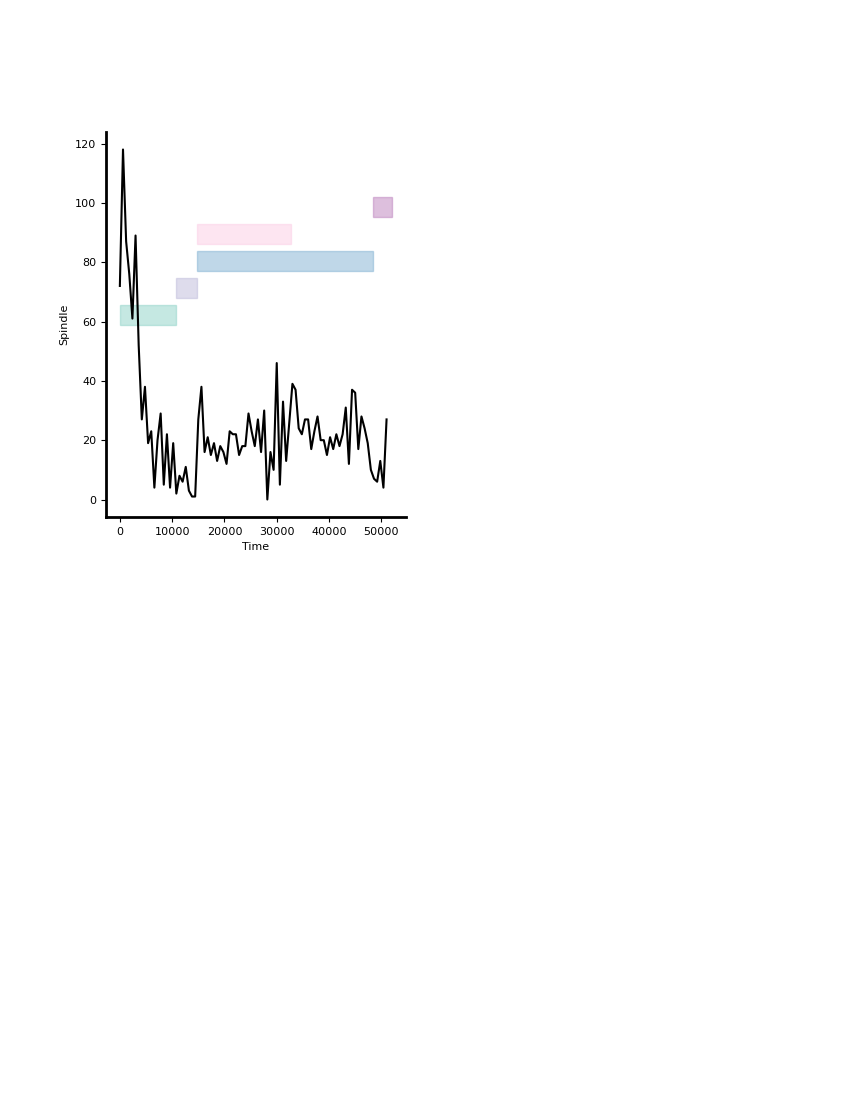

In [19]:
%matplotlib widget
figure = Fig()
fig,gs = figure.draw(grid=(2,2))
for sub, sess in enumerate(sessions):
    ax = plt.subplot(gs[sub])
    starts = sess.spindle.starts
    bins = np.arange(0,sess.eegfile.duration,600)
    hist_spindles = np.histogram(starts,bins=bins)[0] 
    plotting.plot_epochs(ax,sess.paradigm)
    ax.plot(bins[:-1],hist_spindles,'k')
    ax.set_xlabel('Time')
    ax.set_ylabel('Spindle')

